# 데이터

In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,733 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124565 files and dire

In [ ]:
import random, os
import torch
import pandas as pd
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
SEED = 42

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/dayoon/데이터톤/공유 데이터셋 및 베이스라인코드/데이터 최신버젼/'
df = pd.read_csv(f'{DATA_PATH}train_fin2.csv')
test_df = pd.read_csv(f'{DATA_PATH}test_fin2.csv')

In [ ]:
df.shape, test_df.shape

((44791, 195), (11198, 195))

# 추가 전처리

In [ ]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

df['연령대'] = pd.cut(df['나이'], bins=bins, labels=labels, right=True, include_lowest=True)
test_df['연령대'] = pd.cut(test_df['나이'], bins=bins, labels=labels, right=True, include_lowest=True)

### 개인 프로필

In [ ]:
tmp = df.groupby(['연령대','시도', '동읍'],observed=False)['소득4분위'].agg(lambda x: x.mode()[0] - 1 if x.mode()[0] >= 2 else 1).reset_index()
df = df.merge(tmp, on=['연령대', '시도', '동읍'], how='left', suffixes=('', '_median'))
df['소득4분위'] = np.where(
    df['소득4분위'].isin([8,9]), df['소득4분위_median'],df['소득4분위']
)
df.drop(columns=['소득4분위_median'], inplace=True)

test_df = test_df.merge(tmp, on=['연령대', '시도', '동읍'], how='left', suffixes=('', '_median'))
test_df['소득4분위'] = np.where(
    test_df['소득4분위'].isin([8,9]), test_df['소득4분위_median'], test_df['소득4분위']
)
test_df.drop(columns=['소득4분위_median'], inplace=True)

In [ ]:
tmp = df.groupby(['연령대','시도', '동읍'],observed=False)['소득5분위'].agg(lambda x: x.mode()[0] - 1 if x.mode()[0] >= 2 else 1).reset_index()
df = df.merge(tmp, on=['연령대', '시도', '동읍'], how='left', suffixes=('', '_median'))
df['소득5분위'] = np.where(
    df['소득5분위'].isin([8,9]), df['소득5분위_median'], df['소득5분위']
)
df.drop(columns=['소득5분위_median'], inplace=True)

test_df = test_df.merge(tmp, on=['연령대', '시도', '동읍'], how='left', suffixes=('', '_median'))
test_df['소득5분위'] = np.where(
    test_df['소득5분위'].isin([8,9]), test_df['소득5분위_median'], test_df['소득5분위']
)
test_df.drop(columns=['소득5분위_median'], inplace=True)

In [ ]:
tmp = df.groupby(['시도', '동읍'],observed=False)['가구소득4분위'].agg(lambda x: x.mode()[0] - 1 if x.mode()[0] >= 2 else 1).reset_index()
df = df.merge(tmp, on=['시도', '동읍'], how='left', suffixes=('', '_median'))
df['가구소득4분위'] = np.where(
    df['가구소득4분위'].isin([8,9]), df['가구소득4분위_median'],df['가구소득4분위']
)
df.drop(columns=['가구소득4분위_median'], inplace=True)

test_df = test_df.merge(tmp, on=['시도', '동읍'], how='left', suffixes=('', '_median'))
test_df['가구소득4분위'] = np.where(
    test_df['가구소득4분위'].isin([8,9]), test_df['가구소득4분위_median'],test_df['가구소득4분위']
)
test_df.drop(columns=['가구소득4분위_median'], inplace=True)

In [ ]:
tmp = df.groupby(['시도', '동읍'],observed=False)['가구소득5분위'].agg(lambda x: x.mode()[0] - 1 if x.mode()[0] >= 2 else 1).reset_index()
df = df.merge(tmp, on=['시도', '동읍'], how='left', suffixes=('', '_median'))
df['가구소득5분위'] = np.where(
    df['가구소득5분위'].isin([8,9]), df['가구소득5분위_median'],df['가구소득5분위']
)
df.drop(columns=['가구소득5분위_median'], inplace=True)

test_df = test_df.merge(tmp, on=['시도', '동읍'], how='left', suffixes=('', '_median'))
test_df['가구소득5분위'] = np.where(
    test_df['가구소득5분위'].isin([8,9]), test_df['가구소득5분위_median'], test_df['가구소득5분위']
)
test_df.drop(columns=['가구소득5분위_median'], inplace=True)

In [ ]:
df['임신경험여부'] = df['임신경험여부'].replace({9:0, 2:0, -1:0 })
test_df['임신경험여부'] = test_df['임신경험여부'].replace({9:0, 2:0, -1:0})

df['임신여부'] = df['임신여부'].replace(8, 0)
test_df['임신여부'] = test_df['임신여부'].replace(8, 0)

df['모유수유경험'] = df['모유수유경험'].replace(9, 0)
test_df['모유수유경험'] = test_df['모유수유경험'].replace(9, 0)

df["경구피임약복용여부"] = df["경구피임약복용여부"].replace({2:0, -1:0 })
test_df["경구피임약복용여부"] = test_df["경구피임약복용여부"].replace({2:0, -1:0 })

In [ ]:
df['가구세대구성'] = df['가구세대구성'].replace(9,4) #test set은 9 없음

#성별
df['성별'] = df['성별']-1
test_df['성별'] = test_df['성별']-1

#기초생활 수급
df['기초생활수급여부'] = df['기초생활수급여부'].replace({
    10:1, 20:0, 99:0})

test_df['기초생활수급여부'] = test_df['기초생활수급여부'].replace({
    10:1, 20:0, 99:0})

#경제활동상태
df['경제활동상태'] = df['경제활동상태'].replace({2:0, 9:0})
test_df['경제활동상태'] = test_df['경제활동상태'].replace({2:0, 9:0})

#민간보험
df['민간의료보험가입여부'] = df['민간의료보험가입여부'].replace({2:0, 9:0})
test_df['민간의료보험가입여부'] = test_df['민간의료보험가입여부'].replace({2:0, 9:0})

#주택소유
df['주택소유여부'] = df['주택소유여부'].replace(
    {1:0, 2:1, 3:2, 9:0})

test_df['주택소유여부'] = test_df['주택소유여부'].replace(
    {1:0, 2:1, 3:2, 9:0})

#결혼여부
df['결혼여부'] = df['결혼여부'].replace({
    2:0, 9:0})

test_df['결혼여부'] = test_df['결혼여부'].replace({
    2:0, 9:0})

#결혼상태
df['결혼상태'] = np.where(
    df['결혼여부']==0, 0,
    np.where(df['결혼상태'].isin([8,9,99]), 0, df['결혼상태']))

test_df['결혼상태'] = np.where(
    test_df['결혼여부']==0, 0,
    np.where(test_df['결혼상태'].isin([8,9,99]), 0, test_df['결혼상태']))

In [ ]:
df['교육수준_재분류'] = np.where(
   df['학력']==8, 5,  df['교육수준_재분류'])

test_df['교육수준_재분류'] = np.where(
   test_df['학력']==8, 5,  test_df['교육수준_재분류'])

In [ ]:
tmp = df.groupby(['연령대', '소득5분위','성별'], observed=False)['교육수준_재분류'].agg(lambda x: x.mode()[0]).reset_index()
df = df.merge(tmp, on=['연령대', '소득5분위','성별'], how='left', suffixes=('', '_mode'))
df['학력'] = np.where(
    df['학력']== 99, df['교육수준_재분류_mode'], df['학력'])

test_df = test_df.merge(tmp, on=['연령대', '소득5분위','성별'], how='left', suffixes=('', '_mode'))
test_df['학력'] = np.where(
    test_df['학력']== 99, test_df['교육수준_재분류_mode'], test_df['학력'])

df.drop(columns=['교육수준_재분류_mode'], inplace=True)
test_df.drop(columns=['교육수준_재분류_mode'], inplace=True)

### 주관적 인식

In [ ]:
df['주관적체형인식'] = df['주관적체형인식'].replace(9,3)
test_df['주관적체형인식'] = test_df['주관적체형인식'].replace(9,3)

df['주관적건강인지'] = df['주관적건강인지'].replace(9,3)
test_df['주관적건강인지'] = test_df['주관적건강인지'].replace(9,3)

df['2주 내 몸이 불편했는지'] = df['2주 내 몸이 불편했는지'].replace({2:0, 9:0})
test_df['2주 내 몸이 불편했는지'] = test_df['2주 내 몸이 불편했는지'].replace({2:0, 9:0})

df['2주이상연속우울감여부'] = df['2주이상연속우울감여부'].replace({9:0, 2:0})
test_df['2주이상연속우울감여부'] = test_df['2주이상연속우울감여부'].replace({9:0, 2:0})

In [ ]:
df['불편한 일수'] = np.where(
    (df['2주 내 몸이 불편했는지']==1) & (df['불편한 일수'].isin([0, -1])), 1,
    np.where(df['2주 내 몸이 불편했는지']==0, 0, df['불편한 일수']))

test_df['불편한 일수'] = np.where(
    (test_df['2주 내 몸이 불편했는지']==1) & (test_df['불편한 일수'].isin([0, -1])), 1,
    np.where(test_df['2주 내 몸이 불편했는지']==0, 0, test_df['불편한 일수']))

### 본인 및 가족 질환, 검진, 관리

In [ ]:
cols = ["만성질환_가족력", "부_고혈압", "모_고혈압", "부_고지혈증", "모_고지혈증",
    "형제자매_고지혈증여부", "부_허혈성심장질환", "모_허혈성심장질환", "형제자매_허혈성심장질환",
    "부_뇌졸중", "모_뇌졸중", "형제자매_뇌졸중", "부_당뇨여부", "모_당뇨여부"]

for col in cols:
  df[col] = df[col].replace(9,0)
  test_df[col] = test_df[col].replace(9,0)

In [ ]:
df['1년간정신상담여부'].value_counts()

,count
1년간정신상담여부,
2.0,42929
1.0,1371
9.0,491


In [ ]:
df['독감예방접종여부'] = df['독감예방접종여부'].replace({2:0, 9:0})
test_df['독감예방접종여부'] = test_df['독감예방접종여부'].replace({2:0, 9:0})

df['2년내암검진여부'] = df['2년내암검진여부'].replace({2:0, 9:0})
test_df['2년내암검진여부'] = test_df['2년내암검진여부'].replace({2:0, 9:0})

df['1년내손상발생여부'] = df['1년내손상발생여부'].replace({2:0, 9:0})
test_df['1년내손상발생여부'] = test_df['1년내손상발생여부'].replace({2:0, 9:0})

df['1년간정신상담여부'] = df['1년간정신상담여부'].replace({2:0, 9:0})
test_df['1년간정신상담여부'] = test_df['1년간정신상담여부'].replace({2:0, 9:0})

df['1년간체중조절여부'] = df['1년간체중조절여부'].replace(9, 4)
test_df['1년간체중조절여부'] = test_df['1년간체중조절여부'].replace(9, 4)

df['체중변화'] = df['체중변화'].replace(9, 4)
test_df['체중변화'] = test_df['체중변화'].replace(9, 4)

df['식사요법이유'] = df['식사요법이유'].replace({8:0, 9:0})
test_df['식사요법이유'] = test_df['식사요법이유'].replace({8:0, 9:0})

df['가구내식생활관리자여부'] = df['가구내식생활관리자여부'].replace({2:0, 9:0})
test_df['가구내식생활관리자여부'] = test_df['가구내식생활관리자여부'].replace({2:0, 9:0})

df['지방_식이섬유'] = df['지방섭취량'] / np.where(df['식이섬유섭취량']==0, 1, df['식이섬유섭취량'])
test_df['지방_식이섬유'] = test_df['지방섭취량'] / np.where(test_df['식이섬유섭취량']==0, 1, test_df['식이섬유섭취량'])

In [ ]:
df['천식유병기간'] = np.where(
    df['천식진단시기']<=df['나이'], df['나이'] - df['천식진단시기'],
    np.where((df['천식의사진단여부']==1) & (df['천식진단시기']>df['나이']), -2, 0))

test_df['천식유병기간'] = np.where(
    test_df['천식진단시기']<=test_df['나이'], test_df['나이'] - test_df['천식진단시기'],
    np.where((test_df['천식의사진단여부']==1) & (test_df['천식진단시기']>test_df['나이']), -2, 0))

tmp_value = df[~df['천식유병기간'].isin([0, -2])]['천식유병기간'].median()
df['천식유병기간'] = df['천식유병기간'].replace(-2, tmp_value)
test_df['천식유병기간'] = test_df['천식유병기간'].replace(-2, tmp_value)

In [ ]:
df['아토피유병기간'] = np.where(
    df['아토피진단시기']<=df['나이'], df['나이'] - df['아토피진단시기'],
    np.where((df['아토피의사진단여부']==1) & (df['아토피진단시기']>df['나이']), -2, 0))

test_df['아토피유병기간'] = np.where(
    test_df['아토피진단시기']<=test_df['나이'], test_df['나이'] - test_df['아토피진단시기'],
    np.where((test_df['아토피의사진단여부']==1) & (test_df['아토피진단시기']>test_df['나이']), -2, 0))

tmp_value = df[~df['아토피유병기간'].isin([0, -2])]['아토피유병기간'].median()
df['아토피유병기간'] = df['아토피유병기간'].replace(-2, tmp_value)
test_df['아토피유병기간'] = test_df['아토피유병기간'].replace(-2, tmp_value)

In [ ]:
df['비염유병기간'] = np.where(
    df['비염진단시기']<=df['나이'], df['나이'] - df['비염진단시기'],
    np.where((df['비염의사진단여부']==1) & (df['비염진단시기']>df['나이']), -2, 0))

test_df['비염유병기간'] = np.where(
    test_df['비염진단시기']<=test_df['나이'], test_df['나이'] - test_df['비염진단시기'],
    np.where((test_df['비염의사진단여부']==1) & (test_df['비염진단시기']>test_df['나이']), -2, 0))

tmp_value = df[~df['비염유병기간'].isin([0, -2])]['비염유병기간'].median()
df['비염유병기간'] = df['비염유병기간'].replace(-2, tmp_value)
test_df['비염유병기간'] = test_df['비염유병기간'].replace(-2, tmp_value)

### 음주

In [ ]:
df['음주경험'] = df['음주경험'].replace({1:0, 9:0, 2:1})
test_df['음주경험'] = test_df['음주경험'].replace({1:0, 9:0, 2:1})

In [ ]:
df['1년간음주빈도'] = df['1년간음주빈도'].replace(
    {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 8:0, 9:0})

test_df['1년간음주빈도'] = test_df['1년간음주빈도'].replace(
    {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 8:0, 9:0})

In [ ]:
df['회당음주량_범주'] = np.where(
    (df['1년간음주빈도']==0) | (df['회당음주량_범주']==9), 0, df['회당음주량_범주'])

test_df['회당음주량_범주'] = np.where(
    (test_df['1년간음주빈도']==0) | (test_df['회당음주량_범주']==9), 0, test_df['회당음주량_범주'])

In [ ]:
df['폭음빈도'] = np.where(
    df['폭음빈도']==9, 0, df['폭음빈도']-1)

test_df['폭음빈도'] = np.where(
    test_df['폭음빈도']==9, 0, test_df['폭음빈도']-1)

In [ ]:
df['성인_1년내음주문제상담여부'] = df['성인_1년내음주문제상담여부'].replace({2:0, 9:0})
test_df['성인_1년내음주문제상담여부'] = test_df['성인_1년내음주문제상담여부'].replace({2:0, 9:0})

## 추가변수 - shaply value

from itertools import combinations

cols = ['연령대','고혈압_정도']
for iter in combinations(cols, 2):
  df['_'.join(iter)] = df[iter[0]].astype(str) + "_" + df[iter[1]].astype(str)
for iter in combinations(cols, 2):
  test_df['_'.join(iter)] = test_df[iter[0]].astype(str) + "_" + test_df[iter[1]].astype(str)

cols = ['연령대','이상지질혈증_정도']
for iter in combinations(cols, 2):
  df['_'.join(iter)] = df[iter[0]].astype(str) + "_" + df[iter[1]].astype(str)
for iter in combinations(cols, 2):
  test_df['_'.join(iter)] = test_df[iter[0]].astype(str) + "_" + test_df[iter[1]].astype(str)

cols = ['연령대','당뇨_정도']
for iter in combinations(cols, 2):
  df['_'.join(iter)] = df[iter[0]].astype(str) + "_" + df[iter[1]].astype(str)
for iter in combinations(cols, 2):
  test_df['_'.join(iter)] = test_df[iter[0]].astype(str) + "_" + test_df[iter[1]].astype(str)

In [ ]:
df['허리_나이'] = np.log(df['허리둘레'] * df['나이'])
test_df['허리_나이'] = np.log(test_df['허리둘레'] * test_df['나이'])

df['체질량_나이'] = np.log(df['체질량지수'] * df['나이'])
test_df['체질량_나이'] = np.log(test_df['체질량지수'] * test_df['나이'])

In [ ]:
df['콜레스테롤섭취량'] = np.where(df['콜레스테롤섭취량']<10, 10, df['콜레스테롤섭취량'])
test_df['콜레스테롤섭취량'] = np.where(test_df['콜레스테롤섭취량']<10, 10, test_df['콜레스테롤섭취량'])

df['식이섬유섭취량'] = np.where(df['식이섬유섭취량']<7, 7, df['식이섬유섭취량'])
test_df['식이섬유섭취량'] = np.where(test_df['식이섬유섭취량']<7, 7, test_df['식이섬유섭취량'])

In [ ]:
df['식습관'] = df['콜레스테롤섭취량'] * df['지방섭취량'] / df['식이섬유섭취량']
test_df['식습관'] = test_df['콜레스테롤섭취량'] * test_df['지방섭취량'] / test_df['식이섬유섭취량']

In [ ]:
df['폐경_비만'] = np.where(df['월경여부'].isin([5,6]), df['월경여부'].astype(str)+'_'+df['비만'].astype(str), '0')
test_df['폐경_비만'] = np.where(test_df['월경여부'].isin([5,6]), test_df['월경여부'].astype(str)+'_'+test_df['비만'].astype(str), '0')

# 인코딩

In [ ]:
cols = ['연령대','가구총소득', '월평균가구총소득', '정규직여부', '임금근로자_상세','최장일자리_직업분류', '최장일자리_종사상지위',
        '최장일자리_임금근로자상세', '안전벨트착용여부_운전시','안전벨트착용여부_앞좌석', '주변의절주권고여부', '음주운전차량동승횟수',
        '치과치료_기타','아침_가족외사람동반여부', '아침_가족외사람동반대상', '점심_가족외사람동반여부', '금연계획', '말하기문제',
        '점심_가족외사람동반대상', '저녁_가족외사람동반여부', '저녁_가족외사람동반대상', '1년간 자살생각여부', '1년간 자살계획여부',
        '1년간 자살시도여부', '천식진단시기', '아토피진단시기', '비염진단시기', '교육수준_재분류' ]

train = df.drop(columns=cols)
test = test_df.drop(columns=cols)

train = train.drop(columns = ['고혈압', '당뇨', '이상지질혈증', '신장질환'])
test = test.drop(columns = ['고혈압', '당뇨', '이상지질혈증', '신장질환'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols = [
    "시도", "가구세대구성", "주택형태",
    "결혼상태", "건강보험종류", "주관적건강인지", "부_교육수준", "모_교육수준",
    "직업대분류", "1년간정신상담여부", "손상_외래", "손상_입원", "손상_응급",  "액상형전자담배경험",
    "머금는담배경험", "물담배경험", "시가경험", "1년간하루이상금연여부",
    "월경여부", "생리여부",
    "최근1년주평균아침식사빈도", "최근1년주평균점심식사빈도", "최근1년주평균저녁식사빈도",
    "평균외식빈도", "2주이상식이보충제복용여부", "영양교육및상담경험여부", "영양표시인지여부",
    "영양표시이용여부", "식사요법이유",'폐경_비만']

enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train[cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
train[enc.get_feature_names_out()] = enc.transform(train[cols]).toarray()
train = train.drop(columns = cols)
test[enc.get_feature_names_out()] = enc.transform(test[cols]).toarray()
test = test.drop(columns = cols)

<ipython-input-35-c551293b1943>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[enc.get_feature_names_out()] = enc.transform(train[cols]).toarray()
<ipython-input-35-c551293b1943>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[enc.get_feature_names_out()] = enc.transform(train[cols]).toarray()
<ipython-input-35-c551293b1943>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

- 정답데이터

In [ ]:
target_columns = ["고혈압", "이상지질혈증", "당뇨"]
y_train = df[target_columns]
y_test = test_df[target_columns]

# 스케일링

In [ ]:
%pip install iterative-stratification

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer, StandardScaler, QuantileTransformer, MaxAbsScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.multioutput import ClassifierChain

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
def multilabel_f1_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

scoring = make_scorer(multilabel_f1_macro)
def check_scaling_score(scaler_list, x, y, model, cv, scoring, n_jobs=-1):
    for scaler_cls in scaler_list:
        scaler = scaler_cls()
        x_scaled = scaler.fit_transform(x)  # x는 배열로 변환

        scores = []
        for train_idx, test_idx in cv.split(x_scaled, y):
            x_train, x_test = x_scaled[train_idx], x_scaled[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            score = f1_score(y_test, y_pred, average='macro')
            scores.append(score)

        print('==================================================================================================================================================')
        print(f"{scaler_cls.__name__:20s}: Mean F1-macro = {np.mean(scores):.4f}, Scores = {scores}")
        print('==================================================================================================================================================')

# KFold로 변경
SEED = 42
cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
base_model = LGBMClassifier(random_state=SEED)
test_model = ClassifierChain(base_model, order='random', random_state=SEED)

# 스케일러 리스트
scaler_list = [StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler,]
               #QuantileTransformer, MaxAbsScaler, Normalizer]

# 함수 실행
check_scaling_score(scaler_list, train.values, y_train.values, test_model, cv, scoring=scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.339682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6788
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6790
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6792
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6767
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6769
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6771
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6761
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16136, number of negative: 19697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.127669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6763
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450311 -> initscore=-0.199414
[LightGBM] [Info] Start training from score -0.199414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6765
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6764
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329649 -> initscore=-0.709771
[LightGBM] [Info] Start training from score -0.709771


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6766
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450352 -> initscore=-0.199250
[LightGBM] [Info] Start training from score -0.199250


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.133237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6768
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150815 -> initscore=-1.728224
[LightGBM] [Info] Start training from score -1.728224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6762
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6764
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6766
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

StandardScaler      : Mean F1-macro = 0.7621, Scores = [0.7611388988598576, 0.7608528708231622, 0.7649267887956479, 0.7656334027126128, 0.7577660216277072]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6488
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6490
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6492
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6476
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6478
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6480
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6466
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16136, number of negative: 19697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6468
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450311 -> initscore=-0.199414
[LightGBM] [Info] Start training from score -0.199414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6470
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6471
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329649 -> initscore=-0.709771
[LightGBM] [Info] Start training from score -0.709771


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6473
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450352 -> initscore=-0.199250
[LightGBM] [Info] Start training from score -0.199250


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.219546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6475
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150815 -> initscore=-1.728224
[LightGBM] [Info] Start training from score -1.728224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6469
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6471
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6473
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

MinMaxScaler        : Mean F1-macro = 0.7623, Scores = [0.7602668475527077, 0.7606484845010644, 0.7649351578793784, 0.7674547519055048, 0.7581968491932941]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6670
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6672
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6674
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6661
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6663
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6665
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6652
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16136, number of negative: 19697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450311 -> initscore=-0.199414
[LightGBM] [Info] Start training from score -0.199414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.153733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6656
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6657
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329649 -> initscore=-0.709771
[LightGBM] [Info] Start training from score -0.709771


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6659
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450352 -> initscore=-0.199250
[LightGBM] [Info] Start training from score -0.199250


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6661
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150815 -> initscore=-1.728224
[LightGBM] [Info] Start training from score -1.728224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6656
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6658
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

PowerTransformer    : Mean F1-macro = 0.7619, Scores = [0.7602452195032686, 0.7600836068645177, 0.7641769839723942, 0.7662653691665202, 0.7588068342180616]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6487
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6489
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6491
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6476
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6478
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6480
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6465
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16136, number of negative: 19697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6467
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450311 -> initscore=-0.199414
[LightGBM] [Info] Start training from score -0.199414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6469
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6472
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329649 -> initscore=-0.709771
[LightGBM] [Info] Start training from score -0.709771


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6474
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450352 -> initscore=-0.199250
[LightGBM] [Info] Start training from score -0.199250


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6476
[LightGBM] [Info] Number of data points in the train set: 35832, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150815 -> initscore=-1.728224
[LightGBM] [Info] Start training from score -1.728224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

[LightGBM] [Info] Number of positive: 11812, number of negative: 24021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6469
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329640 -> initscore=-0.709812
[LightGBM] [Info] Start training from score -0.709812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16137, number of negative: 19696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6471
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450339 -> initscore=-0.199301
[LightGBM] [Info] Start training from score -0.199301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5404, number of negative: 30429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6473
[LightGBM] [Info] Number of data points in the train set: 35833, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150811 -> initscore=-1.728257
[LightGBM] [Info] Start training from score -1.728257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

RobustScaler        : Mean F1-macro = 0.7628, Scores = [0.761741686487594, 0.759780618695705, 0.7659189167340377, 0.7681781540617568, 0.7585594332901993]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

In [ ]:
#scaler = RobustScaler() #0.7635
#train[train.columns] = scaler.fit_transform(train)
#test[train.columns] = scaler.transform(test)

# model fitting

In [ ]:
base_model = LGBMClassifier(max_depth=7, random_state=SEED)
model = ClassifierChain(base_model, order=[1,0,2], random_state=SEED)

In [ ]:
model.fit(train, y_train)
pred = model.predict_proba(test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 20171, number of negative: 24620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6562
[LightGBM] [Info] Number of data points in the train set: 44791, number of used features: 302
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450336 -> initscore=-0.199313
[LightGBM] [Info] Start training from score -0.199313


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 14765, number of negative: 30026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6564
[LightGBM] [Info] Number of data points in the train set: 44791, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329642 -> initscore=-0.709804
[LightGBM] [Info] Start training from score -0.709804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6755, number of negative: 38036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6566
[LightGBM] [Info] Number of data points in the train set: 44791, number of used features: 304
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150812 -> initscore=-1.728250
[LightGBM] [Info] Start training from score -1.728250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
pred1 = np.where(pred > 0.5, 1, 0)
print(f1_score(y_test, pred1, average='macro'))
print(f1_score(y_test[:,0], pred1[:,0], average='macro'), f1_score(y_test[:,1], pred1[:,1], average='macro'), f1_score(y_test[:,2], pred1[:,2], average='macro'))
print(accuracy_score(y_test[:,0], pred1[:,0]), accuracy_score(y_test[:,1], pred1[:,1]), accuracy_score(y_test[:,2], pred1[:,2]))
print(roc_auc_score(y_test[:,0], pred[:,0]), roc_auc_score(y_test[:,1], pred[:,1]), roc_auc_score(y_test[:,2], pred[:,2]))

0.7698390289681779
0.8903642867309643 0.7292481259920198 0.882493579357907
0.9103411323450616 0.7415609930344704 0.9484729415967137
0.9342244514247757 0.8226348448026097 0.9299591593168941


In [ ]:
thresholds = [0.5, 0.38, 0.45]
pred1 = np.zeros_like(pred, dtype=int)

for i, val in enumerate(thresholds):
    pred1[:, i] = np.where(pred[:, i] > val, 1, 0)

print(f1_score(y_test, pred1, average='macro'))
print(f1_score(y_test[:,0], pred1[:,0], average='macro'), f1_score(y_test[:,1], pred1[:,1], average='macro'), f1_score(y_test[:,2], pred1[:,2], average='macro'))
print(accuracy_score(y_test[:,0], pred1[:,0]), accuracy_score(y_test[:,1], pred1[:,1]), accuracy_score(y_test[:,2], pred1[:,2]))
print(roc_auc_score(y_test[:,0], pred[:,0]), roc_auc_score(y_test[:,1], pred[:,1]), roc_auc_score(y_test[:,2], pred[:,2]))

0.783378768581891
0.8903642867309643 0.7155482382865308 0.8820625482293438
0.9103411323450616 0.7155742096803 0.948205036613681
0.9342244514247757 0.8226348448026097 0.9299591593168941


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test[:,1], pred1[:,1])

TN, FP, FN, TP = cm.ravel()

# 비율 계산
total = TN + FP + FN + TP
TN_ratio = TN / total
FP_ratio = FP / total
FN_ratio = FN / total
TP_ratio = TP / total

# 출력
print("Confusion Matrix:")
print(cm)
print(f"True Negative (TN): {TN} ({TN_ratio:.2%})")
print(f"False Positive (FP): {FP} ({FP_ratio:.2%})")
print(f"False Negative (FN): {FN} ({FN_ratio:.2%})")
print(f"True Positive (TP): {TP} ({TP_ratio:.2%})")

Confusion Matrix:
[[4060 2095]
 [1090 3953]]
True Negative (TN): 4060 (36.26%)
False Positive (FP): 2095 (18.71%)
False Negative (FN): 1090 (9.73%)
True Positive (TP): 3953 (35.30%)


# feature selection

In [ ]:
n_labels = y_train.shape[1]
feature_names = train.columns.tolist()
feature_score = pd.DataFrame(feature_names, columns=['Feature'])

for i, model_i in enumerate(model.estimators_):
    current_feature_names = list(feature_names)

    if i > 0:
        current_feature_names += [f"Label_{j}" for j in range(1, i+1)]

    idx = np.argsort(model_i.feature_importances_)[::-1]
    rank = np.arange(len(idx))
    tmp = pd.DataFrame({
        'Feature': np.array(current_feature_names)[idx],  # 피처명
        f"Model_{i+1}_rank": rank  # 순위 점수
    })
    feature_score = feature_score.merge(tmp[['Feature', f"Model_{i+1}_rank"]], on='Feature', how='left')

feature_score['Total_rank'] = feature_score[['Model_1_rank', 'Model_2_rank', 'Model_3_rank']].sum(axis=1)

In [ ]:
cols = feature_score.sort_values(by='Total_rank', ascending=False)['Feature'].tolist()[:15]
train_filtered = train.drop(columns=cols)
test_filtered = test.drop(columns=cols)

In [ ]:
cols

['손상_응급_2',
 '손상_입원_3',
 '손상_입원_2',
 '물담배경험_2.0',
 '머금는담배경험_1.0',
 '물담배경험_1.0',
 '물담배경험_0.0',
 '1년간정신상담여부_1.0',
 '손상_외래_2',
 '손상_외래_3',
 '손상_응급_3',
 '천식의사진단여부',
 '직업대분류_10.0',
 '생리여부_8.0',
 '폐경_비만_6.0_6.0']

In [ ]:
model.fit(train_filtered, y_train)
y_pred = model.predict(train_filtered)
f1_score(y_train, y_pred, average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 20171, number of negative: 24620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6542
[LightGBM] [Info] Number of data points in the train set: 44791, number of used features: 292
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450336 -> initscore=-0.199313
[LightGBM] [Info] Start training from score -0.199313


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 14765, number of negative: 30026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6544
[LightGBM] [Info] Number of data points in the train set: 44791, number of used features: 293
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329642 -> initscore=-0.709804
[LightGBM] [Info] Start training from score -0.709804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6755, number of negative: 38036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6546
[LightGBM] [Info] Number of data points in the train set: 44791, number of used features: 294
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150812 -> initscore=-1.728250
[LightGBM] [Info] Start training from score -1.728250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

0.7948591402214721

In [ ]:
pred = model.predict_proba(test_filtered)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriat

In [ ]:
thresholds = [0.5, 0.38, 0.5]
pred1 = np.zeros_like(pred1, dtype=int)

for i, val in enumerate(thresholds):
    pred1[:, i] = np.where(pred[:, i] > val, 1, 0)

print(f1_score(y_test, pred1, average='macro'))
print(f1_score(y_test[:,0], pred1[:,0], average='macro'), f1_score(y_test[:,1], pred1[:,1], average='macro'), f1_score(y_test[:,2], pred1[:,2], average='macro'))
print(accuracy_score(y_test, pred1))
print(accuracy_score(y_test[:,0], pred1[:,0]), accuracy_score(y_test[:,1], pred1[:,1]), accuracy_score(y_test[:,2], pred1[:,2]))
print(roc_auc_score(y_test, pred))
print(roc_auc_score(y_test[:,0], pred[:,0]), roc_auc_score(y_test[:,1], pred[:,1]), roc_auc_score(y_test[:,2], pred[:,2]))

0.7836125538268327
0.8903642867309643 0.7155482382865308 0.882493579357907
0.6279692802286122
0.9103411323450616 0.7155742096803 0.9484729415967137
0.8956061518480931
0.9342244514247757 0.8226348448026097 0.9299591593168941


In [ ]:
from joblib import dump

dump(model, 'full_model.pt')

#SHAP

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


SHAP Summary Plot for 고혈압:


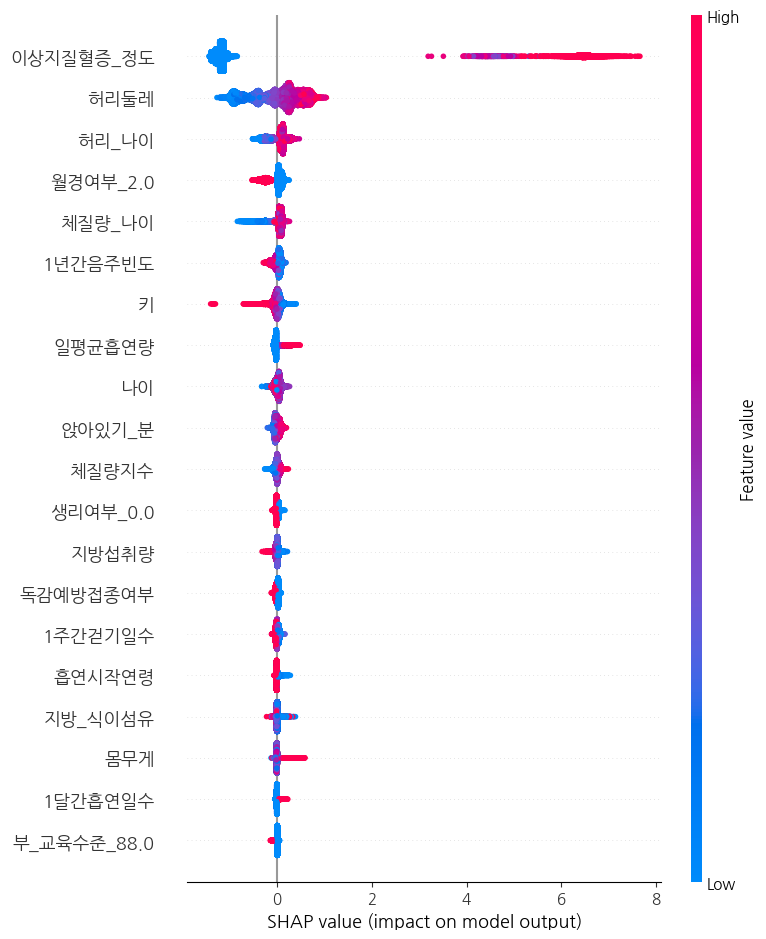

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


SHAP Summary Plot for 이상지질혈증:


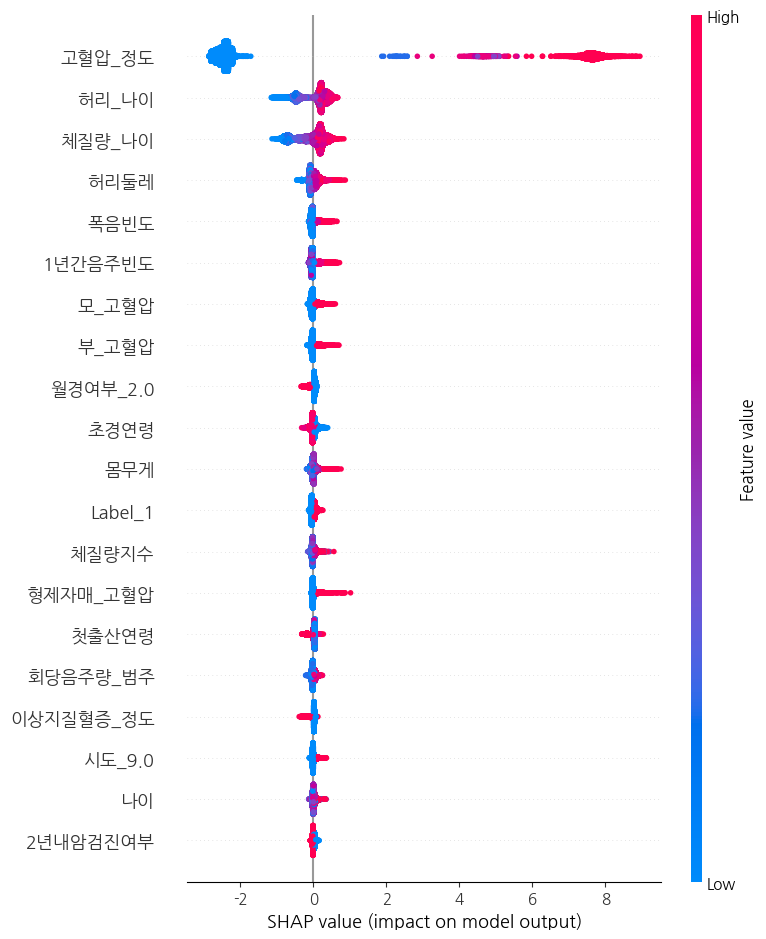

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


SHAP Summary Plot for 당뇨:


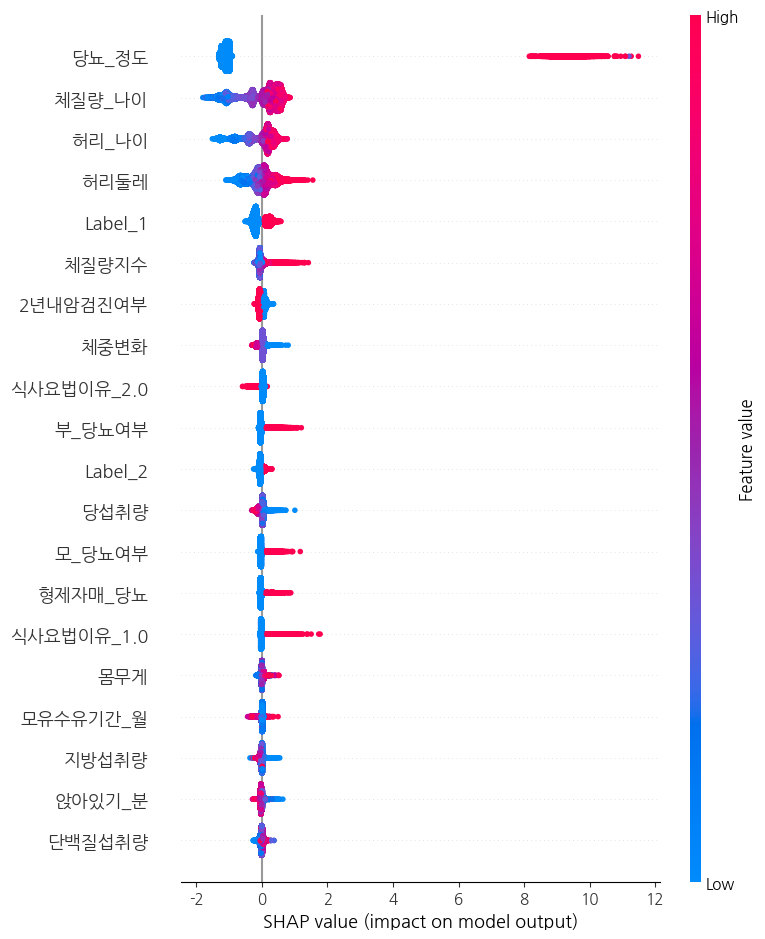

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# y_train의 출력 개수
n_labels = y_train.shape[1]
current_input = train_filtered.copy()

# SHAP 시각화를 위한 루프
for i, model_i in enumerate(model.estimators_):
    # 해당 출력에 대한 SHAP Explainer 생성
    explainer = shap.TreeExplainer(model_i)

    # SHAP 값 계산
    shap_values = explainer.shap_values(current_input)

    # SHAP Summary Plot 생성
    print(f"SHAP Summary Plot for {y_train.columns[i]}:")
    shap.summary_plot(shap_values, current_input)  # 기본형

    # 현재 모델의 예측값 추가 (다음 입력에 포함)
    current_input[f"Label_{i + 1}"] = model_i.predict(current_input)

In [ ]:
%pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
class Obj:
    def __init__(self, x, y, seed, scoring='f1_macro'):
        self.x = x
        self.y = y
        self.seed = seed
        self.cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=self.seed)
        self.scoring = scoring

    def __call__(self, trial):
        hp = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 200),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 25),
            'feature_fraction': trial.suggest_float('colsample_bytree', 0.1, 1.0, step=0.01),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 20, 150),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 100)
        }

        base_model = LGBMClassifier(random_state=SEED, **hp)
        model = ClassifierChain(base_model, order='random', random_state=SEED)


        score = cross_val_score(model, self.x, self.y, cv=self.cv, scoring=self.scoring, n_jobs=-1)
        return score.mean()


In [ ]:
sampler = optuna.samplers.TPESampler(seed=SEED) # 대체모델 = 사후분포

#study 객체
study = optuna.create_study(
    direction="maximize", #scoring > 높을수록 좋음 <-> minimize,
    sampler = sampler

)
obj_func = Obj(train_filtered, y_train, SEED)

study.optimize(obj_func, n_trials=20)

# 앙상블

In [ ]:
hold = 0.5/ (1 - 0.38)
pred2 = pred.copy()
pred2[:,1] = 1 - (1 - pred[:,1])*hold

In [ ]:
pred0 = np.where(pred2 > 0.5, 1, 0)

print(f1_score(y_test, pred0, average='macro'))
print(f1_score(y_test[:,0], pred0[:,0], average='macro'), f1_score(y_test[:,1], pred0[:,1], average='macro'), f1_score(y_test[:,2], pred0[:,2], average='macro'))
print(accuracy_score(y_test, pred0))
print(accuracy_score(y_test[:,0], pred0[:,0]), accuracy_score(y_test[:,1], pred0[:,1]), accuracy_score(y_test[:,2], pred0[:,2]))
print(roc_auc_score(y_test, pred2))
print(roc_auc_score(y_test[:,0], pred2[:,0]), roc_auc_score(y_test[:,1], pred2[:,1]), roc_auc_score(y_test[:,2], pred2[:,2]))

0.7836125538268327
0.8903642867309643 0.7155482382865308 0.882493579357907
0.6279692802286122
0.9103411323450616 0.7155742096803 0.9484729415967137
0.8956061518480931
0.9342244514247757 0.8226348448026097 0.9299591593168941


In [ ]:
dy = pd.read_csv('dy.csv')

In [ ]:
pred_prob = (dy + pred2)/2
pred_prob = pred_prob.values

In [ ]:
hold = 0.5/ (1 - 0.48)
pred_prob[:,0] = 1 - (1 - pred_prob[:,0])*hold
pred_prob[:,1] = 1 - (1 - pred_prob[:,1])*hold

In [ ]:
pred_fin = np.where(pred_prob > 0.5, 1, 0)
print(f1_score(y_test, pred_fin, average='macro'))
print(f1_score(y_test[:,0], pred_fin[:,0], average='macro'), f1_score(y_test[:,1], pred_fin[:,1], average='macro'), f1_score(y_test[:,2], pred_fin[:,2], average='macro'))
print(accuracy_score(y_test, pred_fin))
print(accuracy_score(y_test[:,0], pred_fin[:,0]), accuracy_score(y_test[:,1], pred_fin[:,1]), accuracy_score(y_test[:,2], pred_fin[:,2]))
print(roc_auc_score(y_test, pred_prob))
print(roc_auc_score(y_test[:,0], pred_prob[:,0]), roc_auc_score(y_test[:,1], pred_prob[:,1]), roc_auc_score(y_test[:,2], pred_prob[:,2]))

0.784497636134004
0.8900351389370056 0.7063358202078076 0.8820378065494416
0.618860510805501
0.9103411323450616 0.7067333452402215 0.9483836399357028
0.8980973598062433
0.935776333790317 0.8257147427332092 0.9328010028952037
